In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

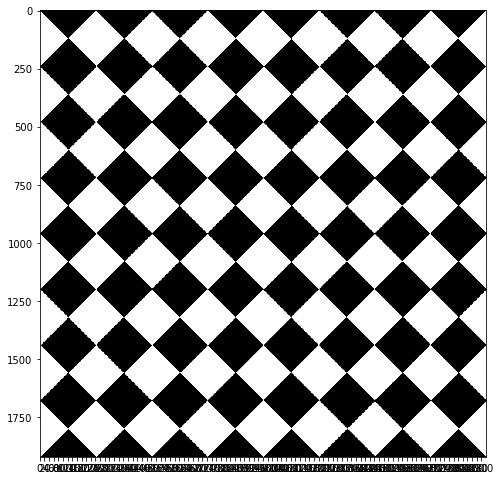

In [19]:
img = cv2.imread('./imgdata/black_white_card.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_gray, cmap='gray')
ax.set_xticks(range(0, img.shape[1], 20))
plt.show()

#### cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]])

+ Inputs:

    + src:uint8或者float32格式的图像
    + blockSize:角点检测中要考虑的领域大小
    + ksize: Sobel算子中求导使用的窗口大小【该方法使用到了Sobel算子用于计算不同方向上的梯度】
    + k: Harris角点检测方程中的超参数，取值范围一般在：[0.04, 0.06]
    
+ Return：
    + 灰度图：灰度图上的每一个像素表示该点为角点中像素的可信程度，选取适当的阈值对结果进行二值化，我们就能得到图像中的角点
    
**Harris角点检测具有旋转不变性（不具有缩放不变性）**

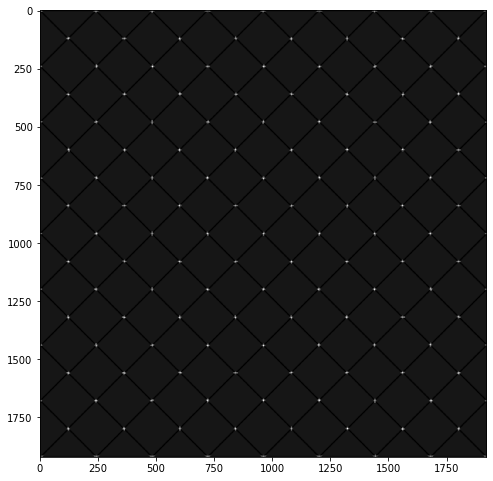

In [20]:
corner_pts = cv2.cornerHarris(np.float32(img_gray.copy()), blockSize=11, ksize=7, k=0.05)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(corner_pts, cmap='gray')
plt.show()

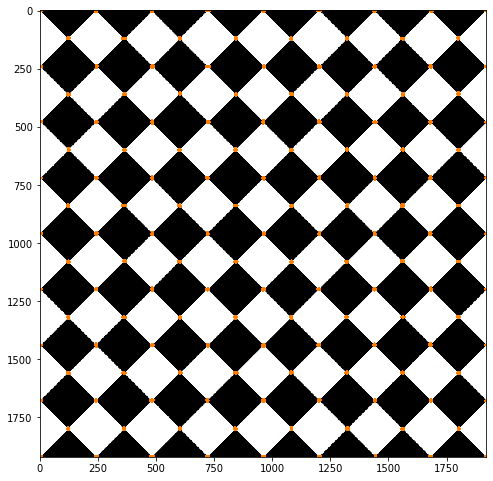

In [23]:
# 放大显示角点
corner_pts = cv2.dilate(corner_pts, None)

# 设置阈值过滤出角点【很关键】
img_rgb_copy = img_rgb.copy()
threshold = 0.2
img_rgb_copy[corner_pts > threshold * corner_pts.max()] = [255, 125, 0]

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_rgb_copy)
plt.show()

<div class="alert alert-block alert-success"> 
<b>有时我们需要最大精度的角点检测，Opencv为我们提供了cv2.cornerSubPix()，它可以提供亚像素级别的角点检测。首先我们需要使用cv2.cornerHarris()找到角点，然后将角点的重心传给这个函数进行修正。在使用这个函数时，我们需要给定一个迭代停止条件，当迭代到一定次数或则精度满足要求后迭代停止，同样需要定义角点检测领域的大小</b>!
</div>

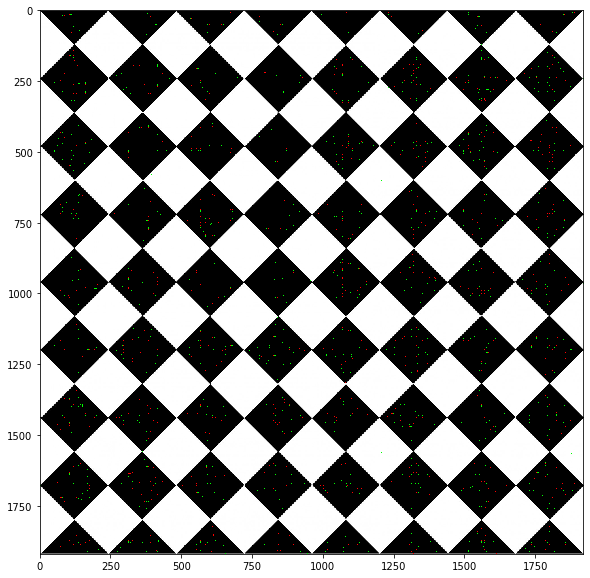

In [37]:
corner_pts = cv2.cornerHarris(np.float32(img_gray.copy()), blockSize=5, ksize=5, k=0.05)
# 放大显示角点
corner_pts_harris = cv2.dilate(corner_pts, None)

# 设置阈值过滤出角点【很关键】
scale = 0.2
thre, img_corner_pts = cv2.threshold(corner_pts_harris, scale * corner_pts.max(), 255, 0)

# 寻找角点重心
corner_pts = np.uint8(corner_pts)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(corner_pts)

# 设置迭代停止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

# 返回的是修正后的角点坐标【而非灰度图像】
corners_subpix = cv2.cornerSubPix(img_gray.copy(), np.float32(centroids), (5, 5), (-1, -1), criteria)

img_rgb_copy = img_rgb.copy()
centroids = np.int0(centroids)
corners_subpix = np.int0(corners_subpix)

# 显示重心
img_rgb_copy[centroids[:, 0], centroids[:, 1], :] = [255, 0, 0]
# 显示角点
img_rgb_copy[corners_subpix[:, 0], corners_subpix[:, 1]] = [0, 255, 0]

plt.figure(figsize=[16, 10])
plt.imshow(img_rgb_copy)
plt.show()